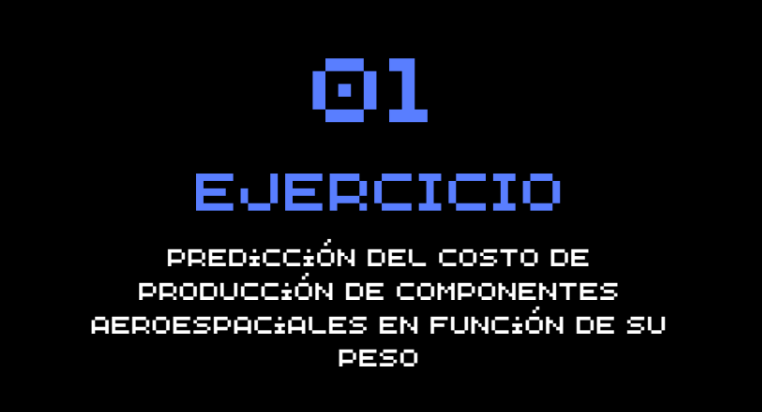
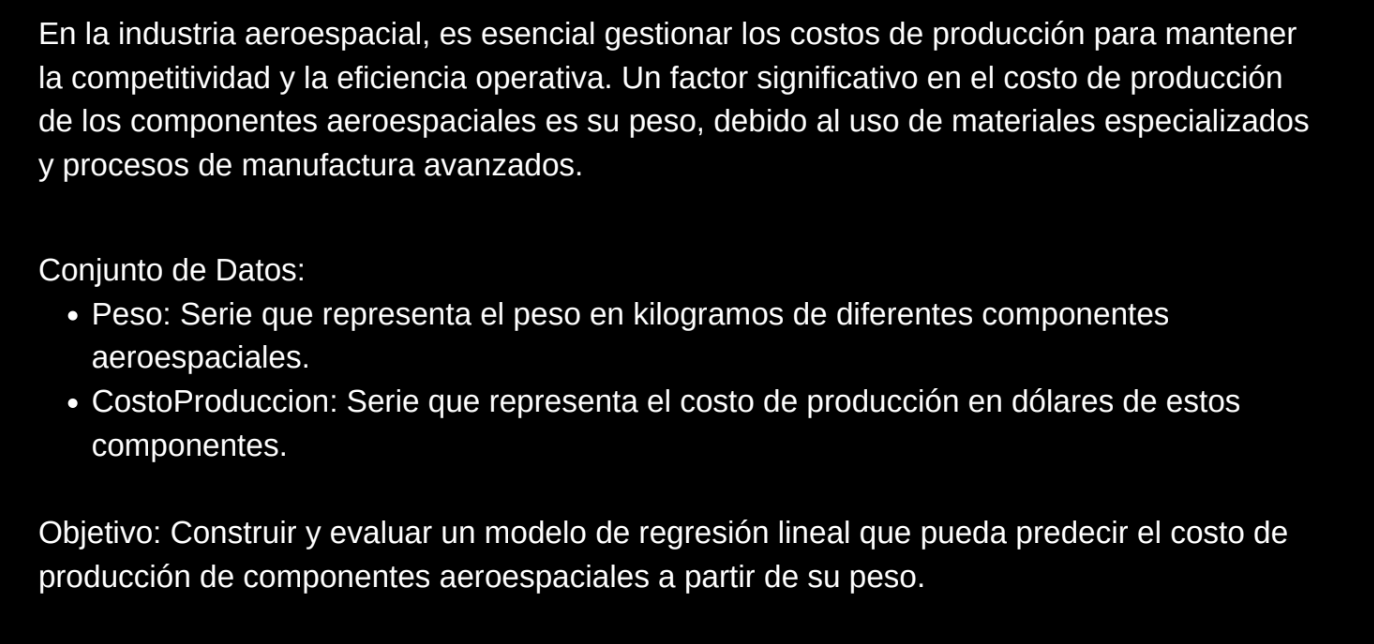
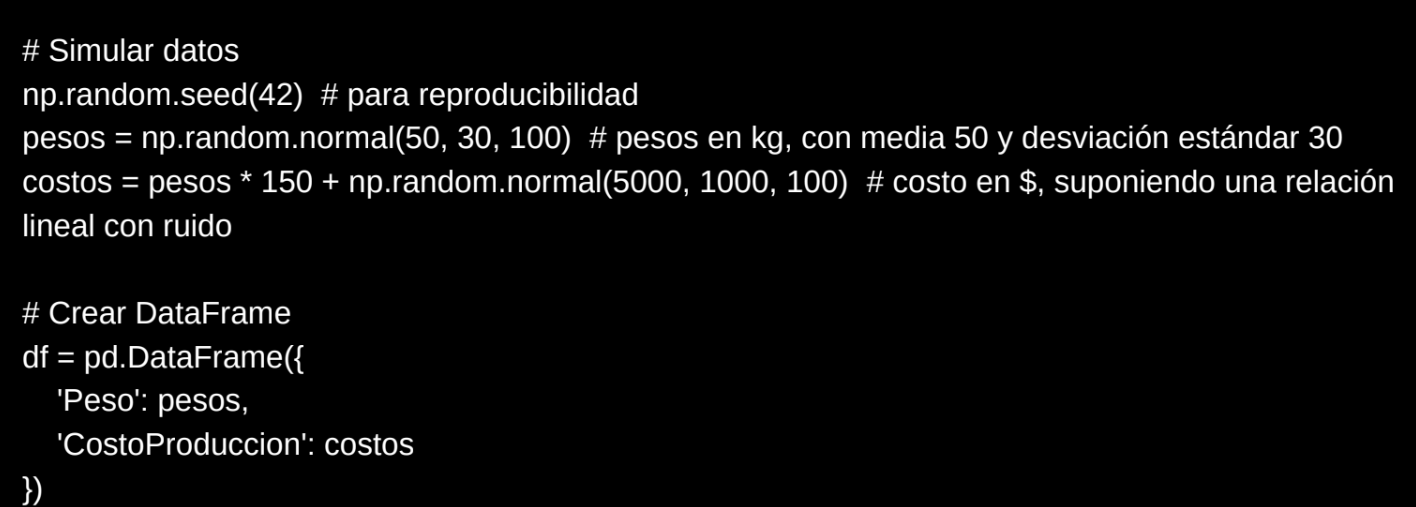

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Simular datos
np.random.seed(42)  # para reproducibilidad
pesos = np.random.normal(50, 30, 100)  # pesos en kg, con media 50 y desviación estándar 30
costos = pesos * 150 + np.random.normal(5000, 1000, 100)  # costo en $, suponiendo una relación lineal con ruido

# Crear DataFrame
df = pd.DataFrame({
    'Peso': pesos,
    'CostoProduccion': costos
})


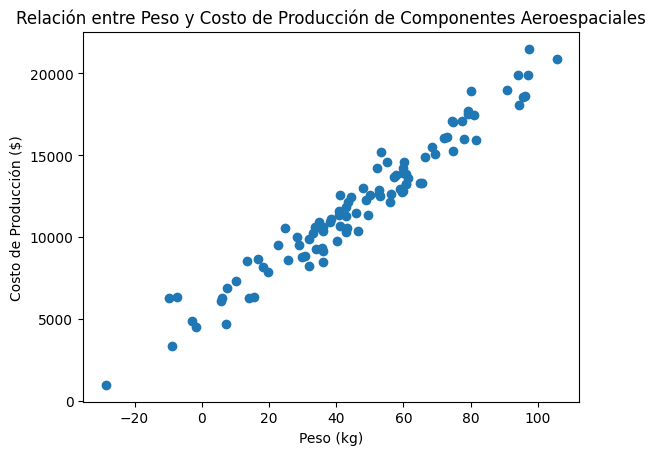

In [11]:
# Visualizar la relación entre Peso y Costo de Producción
plt.scatter(df['Peso'], df['CostoProduccion'])
plt.title('Relación entre Peso y Costo de Producción de Componentes Aeroespaciales')
plt.xlabel('Peso (kg)')
plt.ylabel('Costo de Producción ($)')
plt.show()


In [12]:
# Análisis de correlación
print("Correlación entre Peso y Costo de Producción:")
print(df.corr())


Correlación entre Peso y Costo de Producción:
                     Peso  CostoProduccion
Peso             1.000000         0.972657
CostoProduccion  0.972657         1.000000


In [13]:
# Preparar los datos para el modelo de regresión
X = df['Peso'].values.reshape(-1, 1)  # Cambiar la forma para sklearn
y = df['CostoProduccion'].values


In [14]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [16]:

# Predecir y evaluar el modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("MSE (Error Cuadrático Medio):", mse)
print("R² (Coeficiente de Determinación):", r2)


Evaluación del Modelo:
MSE (Error Cuadrático Medio): 872848.6123745252
R² (Coeficiente de Determinación): 0.9307083545856049


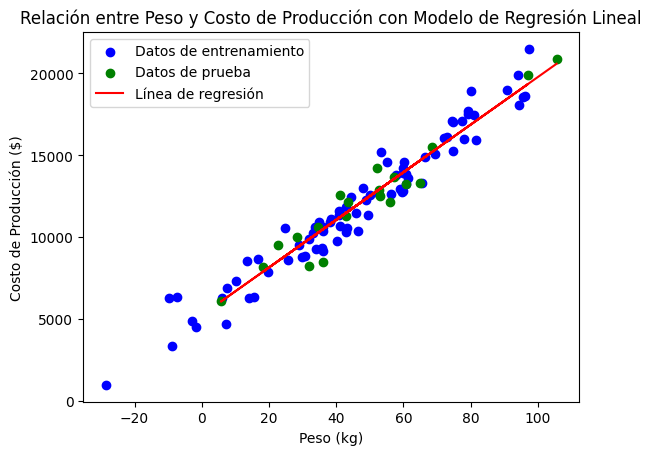

In [17]:
# Visualizar la línea de regresión
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.title('Relación entre Peso y Costo de Producción con Modelo de Regresión Lineal')
plt.xlabel('Peso (kg)')
plt.ylabel('Costo de Producción ($)')
plt.legend()
plt.show()
